In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
plt.style.use('seaborn')

In [4]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,800)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,800)

print(dist_01.shape)
print(dist_02.shape)

(800, 2)
(800, 2)


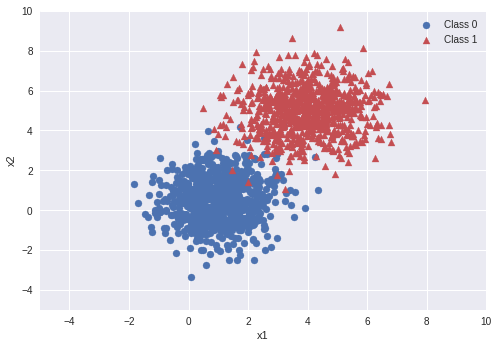

In [5]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()